In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Placement_Data_Full_Class.csv')
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [4]:
df['salary']=df['salary'].fillna(df['salary'].mode()[0])
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

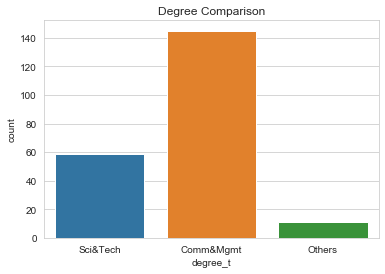

In [5]:
sns.set_style('whitegrid')
sns.countplot(x = 'degree_t', data = df)
plt.title('Degree Comparison')
df['degree_t'].value_counts()

Text(0.5, 1.0, 'No of students placed amongst gender')

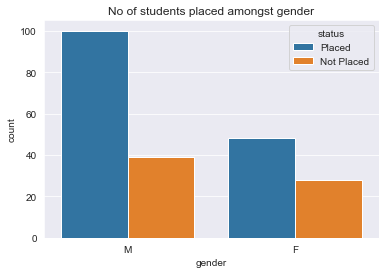

In [6]:
sns.set_style('darkgrid')
sns.countplot(x = 'gender', hue = 'status', data = df)
plt.title('No of students placed amongst gender')

Text(0.5, 1.0, 'No of students placed amongst gender')

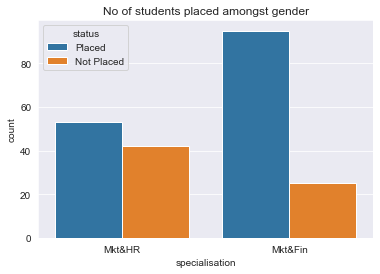

In [7]:
sns.set_style('darkgrid')
sns.countplot(x = 'specialisation', hue = 'status', data = df)
plt.title('No of students placed amongst gender')

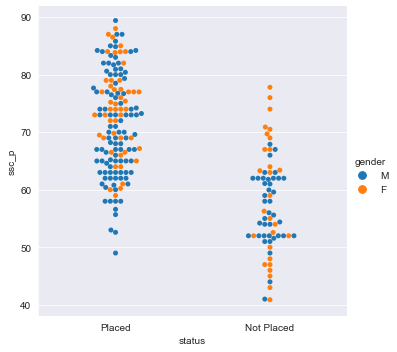

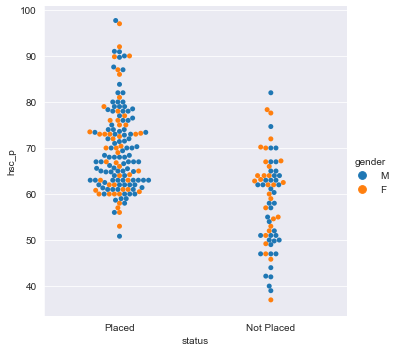

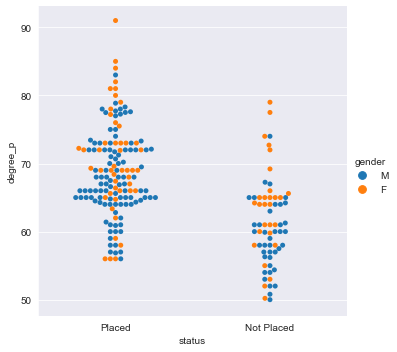

In [8]:
sns.catplot(x="status", y="ssc_p", data=df,kind="swarm",hue='gender')
sns.catplot(x="status", y="hsc_p", data=df,kind="swarm",hue='gender')
sns.catplot(x="status", y="degree_p", data=df,kind="swarm",hue='gender')

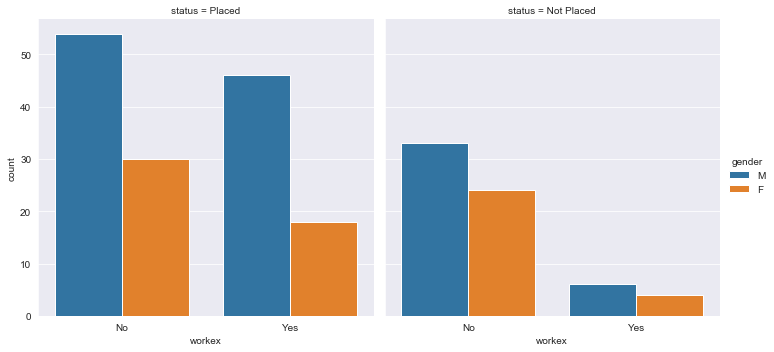

In [9]:
sns.catplot(x="workex", kind="count",hue ='gender', data=df, col='status');

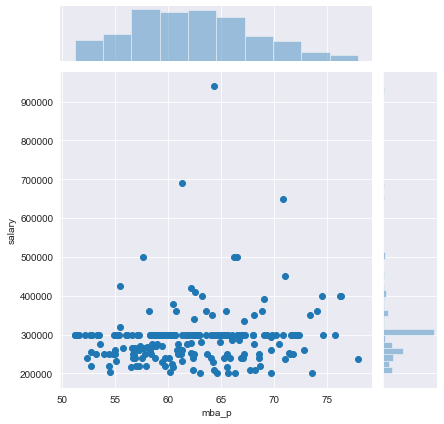

In [10]:
sns.jointplot(x=df['mba_p'], y=df['salary']);

In [11]:
df['gender'].replace(to_replace='M', value=1, inplace=True)
df['gender'].replace(to_replace='F', value=0, inplace=True)

df['ssc_b'].replace(to_replace='Central', value=1, inplace=True)
df['ssc_b'].replace(to_replace='Others', value=0, inplace=True)

df['hsc_b'].replace(to_replace='Central', value=1, inplace=True)
df['hsc_b'].replace(to_replace='Others', value=0, inplace=True)

df['hsc_s'].replace(to_replace='Science', value=1, inplace=True)
df['hsc_s'].replace(to_replace='Commerce', value=2, inplace=True)
df['hsc_s'].replace(to_replace='Arts', value=3, inplace=True)

df['workex'].replace(to_replace='Yes', value=1, inplace=True)
df['workex'].replace(to_replace='No', value=0, inplace=True)

df['specialisation'].replace(to_replace='Mkt&Fin', value=1, inplace=True)
df['specialisation'].replace(to_replace='Mkt&HR', value=0, inplace=True)

In [12]:
df.degree_t.unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [13]:
df['degree_t'].replace(to_replace='Sci&Tech', value=1, inplace=True)
df['degree_t'].replace(to_replace='Comm&Mgmt', value=2, inplace=True)
df['degree_t'].replace(to_replace='Others', value=2, inplace=True)

df['status'].replace(to_replace='Placed', value=1, inplace=True)
df['status'].replace(to_replace='Not Placed', value=0, inplace=True)

df.drop(['sl_no'],axis=1,inplace=True)
df.drop(['salary'],axis=1,inplace=True)

In [14]:
df.head(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,0,91.00,0,2,58.00,1,0,55.00,0,58.80,1
1,1,79.33,1,78.33,0,1,77.48,1,1,86.50,1,66.28,1
2,1,65.00,1,68.00,1,3,64.00,2,0,75.00,1,57.80,1
3,1,56.00,1,52.00,1,1,52.00,1,0,66.00,0,59.43,0
4,1,85.80,1,73.60,1,2,73.30,2,0,96.80,1,55.50,1
5,1,55.00,0,49.80,0,1,67.25,1,1,55.00,1,51.58,0
6,0,46.00,0,49.20,0,2,79.00,2,0,74.28,1,53.29,0
7,1,82.00,1,64.00,1,1,66.00,1,1,67.00,1,62.14,1
8,1,73.00,1,79.00,1,2,72.00,2,0,91.34,1,61.29,1
9,1,58.00,1,70.00,1,2,61.00,2,0,54.00,1,52.21,0


In [15]:
df.dtypes

gender              int64
ssc_p             float64
ssc_b               int64
hsc_p             float64
hsc_b               int64
hsc_s               int64
degree_p          float64
degree_t            int64
workex              int64
etest_p           float64
specialisation      int64
mba_p             float64
status              int64
dtype: object

In [16]:
X = df[['gender', 'ssc_p','ssc_b', 'hsc_p','hsc_b', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p',]]
y = df['status']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [19]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
pred1=dt.predict(X_test)
accuracy_score(pred1,y_test)

0.8372093023255814

In [23]:
confusion_matrix(pred1,y_test)

array([[ 7,  2],
       [ 5, 29]], dtype=int64)

Considering RandomforestClassifier:

In [24]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
pred2=rf.predict(X_test)
accuracy_score(pred2,y_test)

0.9534883720930233

In [27]:
confusion_matrix(pred2,y_test)

array([[10,  0],
       [ 2, 31]], dtype=int64)

Considering XGBoost:

In [28]:
import xgboost as xgb
xgb=xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [29]:
pred3=xgb.predict(X_test)
accuracy_score(pred3,y_test)

0.9767441860465116

In [30]:
confusion_matrix(pred2,y_test)

array([[10,  0],
       [ 2, 31]], dtype=int64)